In [3]:
from google.colab import files
uploaded = files.upload()

Saving AAPL(80-24) Final.csv to AAPL(80-24) Final.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
Data = pd.read_csv("AAPL(80-24) Final.csv")

In [7]:
# Display first few rows
print(Data.head())

         Date   Price    Open    High     Low     Vol. Change %
0  03/27/2024  173.31  170.30  173.58  170.14   59.11M    2.12%
1  03/26/2024  169.71  170.01  171.41  169.65   57.22M   -0.67%
2  03/25/2024  170.85  170.37  171.94  169.46   54.21M   -0.83%
3  03/22/2024  172.28  171.76  173.05  170.06   71.16M    0.53%
4  03/21/2024  171.37  177.05  177.49  170.84  106.18M   -4.09%


In [9]:
# Converting 'Date' to Datetime formate
Data['Date'] = pd.to_datetime(Data['Date'])

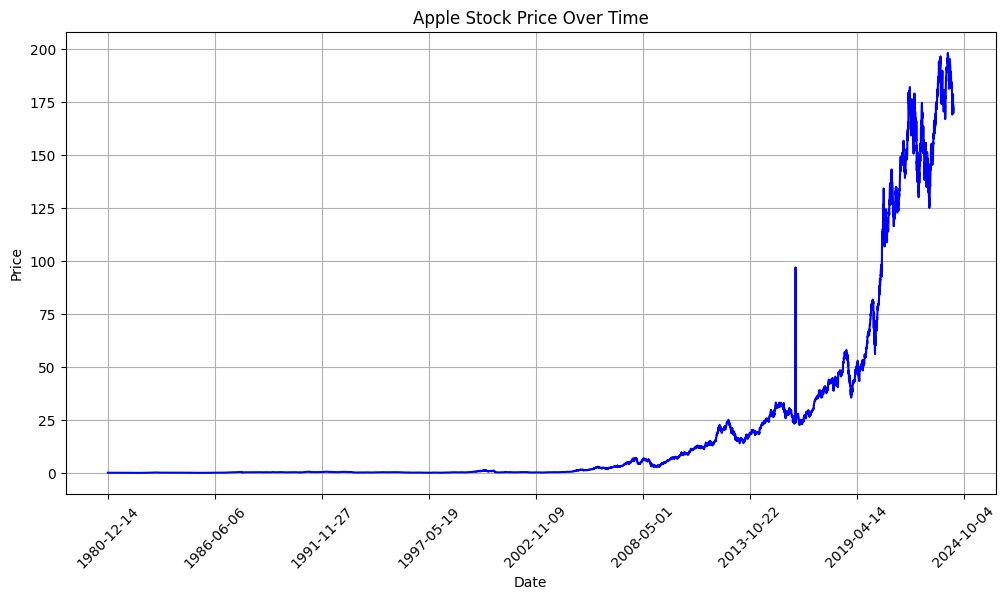

In [13]:
# Visualize the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(Data['Date'], Data['Price'], color='blue')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the frequency of x-axis tick marks
plt.grid(True)
plt.show()

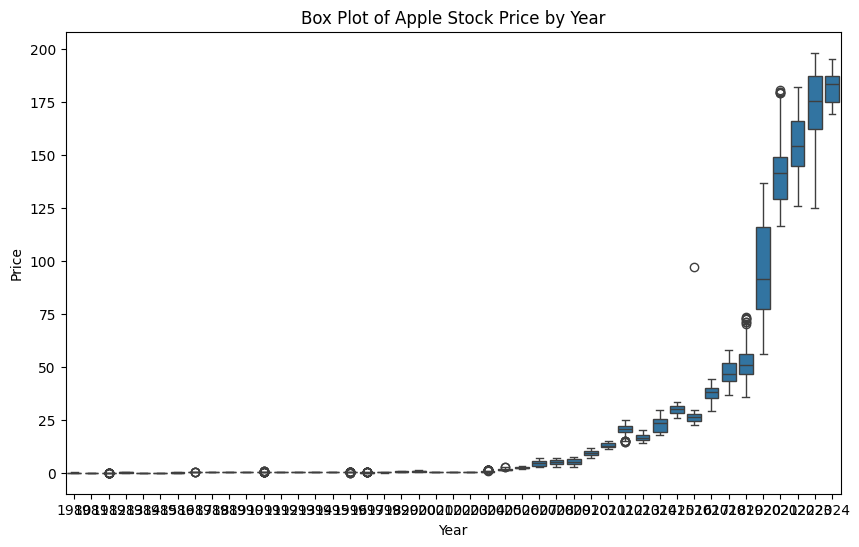

In [15]:
# Create a box plot to visualize price distribution over time (e.g., by year or month)
plt.figure(figsize=(10, 6))
sns.boxplot(x=Data['Date'].dt.year, y=Data['Price']) # Or use .dt.month
plt.title('Box Plot of Apple Stock Price by Year') # Or by Month
plt.xlabel('Year') # or Month
plt.ylabel('Price')
plt.show()


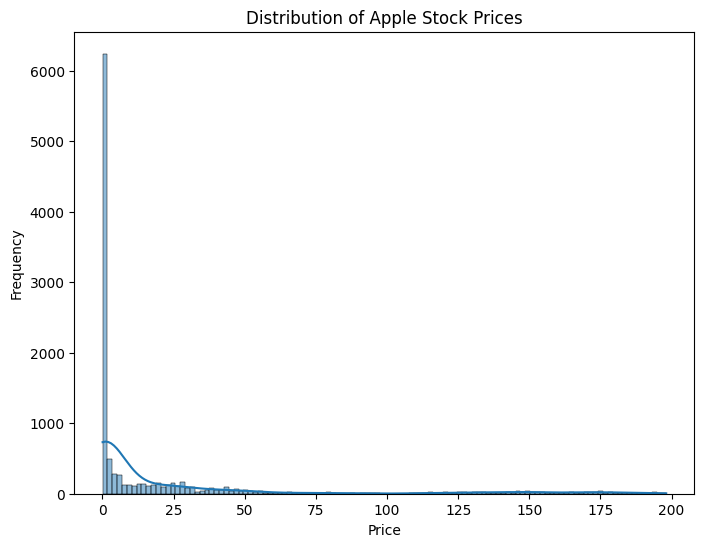

In [14]:
# Plot a histogram of the price distribution
plt.figure(figsize=(8, 6))
sns.histplot(Data['Price'], kde=True)
plt.title('Distribution of Apple Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [16]:
# Prepare the data for Prediction
X = Data[['Price']] # Feature
Y = Data['Price'] # Target variable

In [17]:
# Split the data into Training and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [18]:
# Train a lineaRegression Model
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [19]:
# Making Predictions
y_pred = model.predict(X_test)

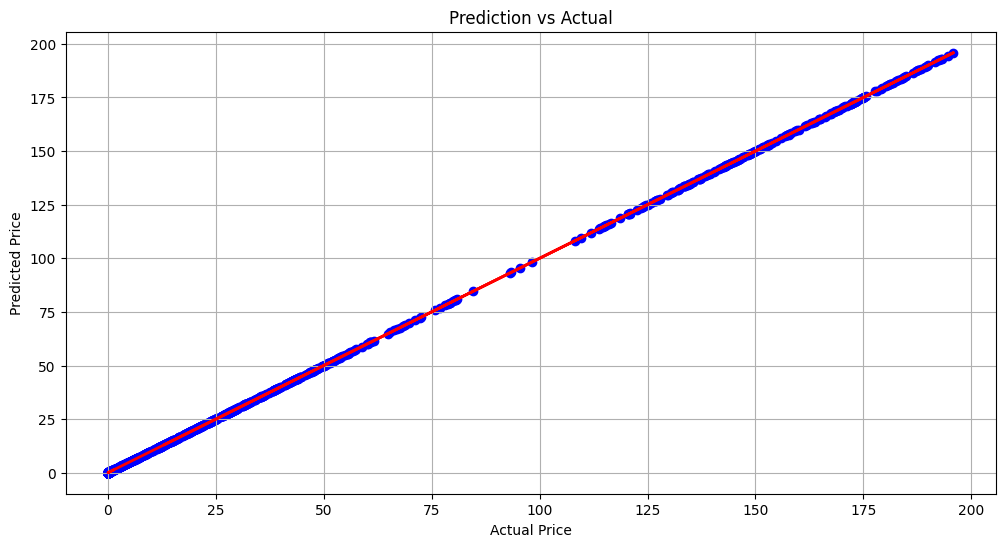

In [20]:
# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Prediction vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

In [21]:
# Evaluate the model
mse =  mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.3508144446352557e-27
R-squared: 1.0


In [23]:
# Evaluate the model
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 3.675342765831856e-14


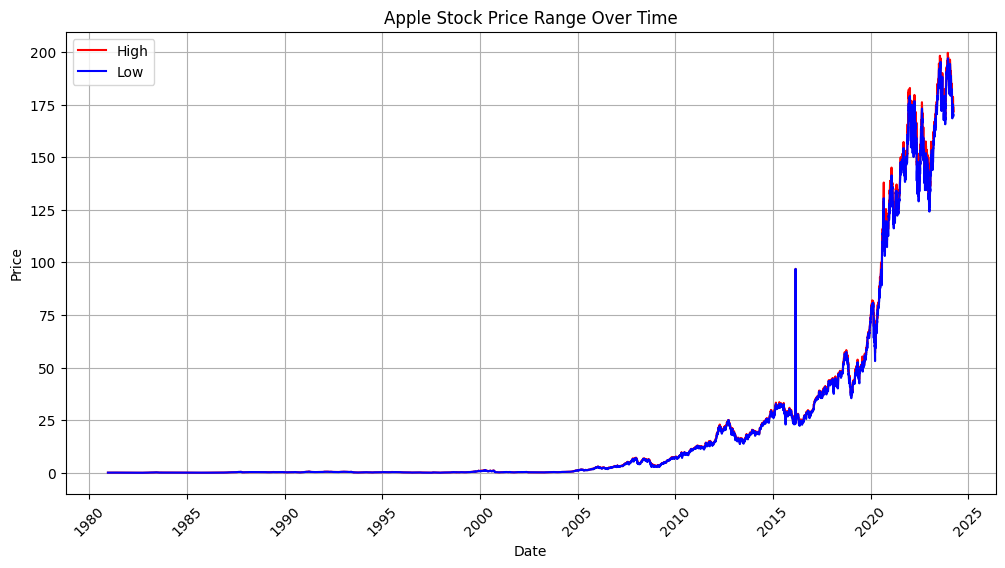

In [22]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(Data['Date'], Data['High'], color='red', label='High')
plt.plot(Data['Date'], Data['Low'], color='blue', label='Low')
plt.fill_between(Data['Date'], Data['Low'], Data['High'], color='gray', alpha=0.2)
plt.title('Apple Stock Price Range Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()